# **Regresi Linear Sederhana**
*Menggunakan Python*

Contoh kasus: Prediksi Gaji berdasarkan Tahun Bekerja
Dataset dapat diakses di: https://drive.google.com/file/d/1DA9elSOBlkCHXwlmQD0Z7gkm0bRnnrpW/view?usp=sharing

Tahapan dalam penggunaan **Simple Linear Regression** adalah sebagai berikut:
1. Import Library 
2. Load Dataset
3. Check the General Information
4. Check and Handling Missing Values
5. Exploratory Data Analysis (EDA)
6. Splitting Data
7. Modelling
8. Evaluation
9. Prediction

# 1.  Import Library

In [1]:
# Impor library yang dibutuhkan yang akan digunakan di seluruh tahapan analisis dan modeling
import numpy as np 
# library untuk perhitungan numerik & array

import matplotlib.pyplot as plt
# library untuk visualisasi data (grafik, chart, bar, dll)

import pandas as pd
#library untuk pengolahan dan cleansing data


# 2. Load Dataset

In [2]:
# Impor dataset dari Google Drive ke dalam Python (menggunakan pandas), agar bisa dianalisis atau dimodelkan.
url = 'https://drive.google.com/file/d/1DA9elSOBlkCHXwlmQD0Z7gkm0bRnnrpW/view?usp=sharing' #tempat file disimpan di google drive
file_id=url.split('/')[-2] # mengambil file ID ke URL
dwn_url='https://drive.google.com/uc?id=' + file_id # mengubah ke Link Download langsung

dataset = pd.read_csv(dwn_url) # untuk membaca file CSV dari URL langsung
print(dataset.head()) # menampilkan data untuk mengecheck struktur data dan memvalidasi bahwa file berhasil dibaca

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


# 3. Check the General Information

Melihat informasi Umum Ini digunakan untuk mengenali data kita.

In [3]:
#untuk melihat ukuran data
dataset.shape

(6704, 6)

In [4]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dataset.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# 4. Handling Missing Values

In [6]:
#Mencari dan menangani missing values.
#Terdapat beberapa missing values sebagaimana hasil berikut:
dataset.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
# Preprocessing data yang bolong, menghapus missing values yg hilang dan nemempatkan kembali ke store dataset
dataset=dataset.dropna()
dataset.head(10000)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [8]:
#Memastikan bahwa dataset yang baru sudah tidak memiliki missing values
dataset.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# 5. Exploratory Data Analysis (EDA)

digunakan untuk lebih mengenal data kita dan menemukan insights dari data.

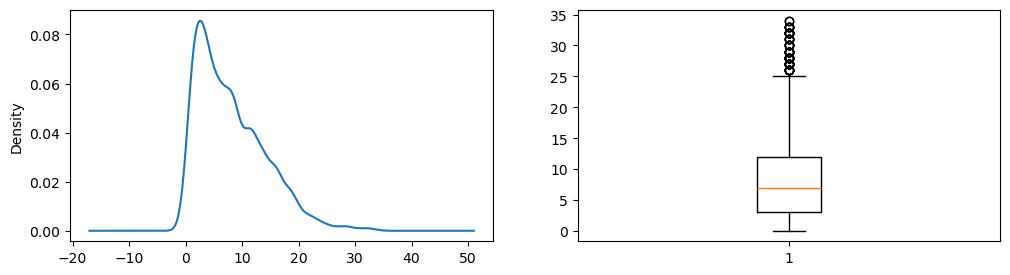

In [9]:
#Melakukan Exploratory Data Analysis (EDA) 
#Univariate analysis year of experience.
#Melihat distribusi dari year of experience.
f = plt.figure(figsize=(12,3))
f.add_subplot(1,2,1)
dataset['Years of Experience'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Years of Experience'])
plt.show()

Penjelasan

* Bagian kiri (KDE Plot): dapat dilihat bahwa mean dan median dari Tahun_bekerja terpusat di sekitar nilai 0-15 Tahun, dengan terdapat beberapa nilai besar diatas 30 tahun.
* Bagian kanan (boxplot): Banyak titik outlier (bulatan diatas) yang menunjukan bahwa terdapat nilai yg lebih besar daripada mayoritas data.



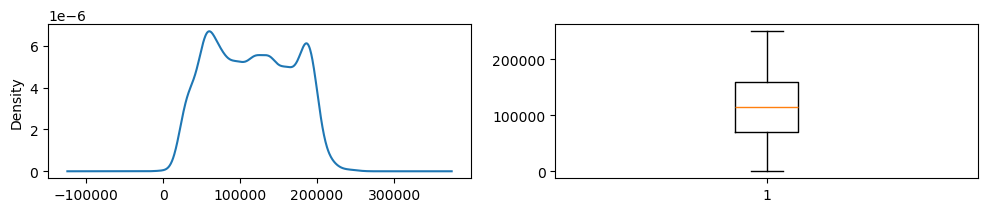

In [10]:
#Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.
#Univariate analysis Gaji.
#Melihat distribusi dari Gaji.
f = plt.figure(figsize=(12,2))
f.add_subplot(1,2,1)
dataset['Salary'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Salary'])
plt.show()

Penjelasan
* KDE Plot bagian kiri menunjukan bahwa nilai gaji berada pada rentan 0 hingga 250.000
* Boxplot bagian kanan menunjukan bahwa median gaji disekitar angka 100.000-125.000 dan tidak terdapat outlier



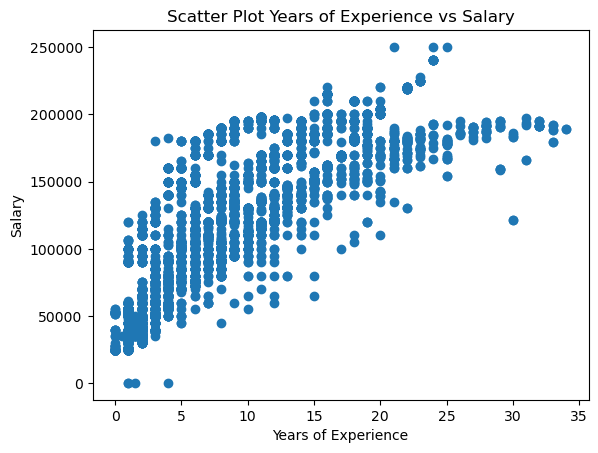

In [11]:
#Bivariate analysis untuk melihat hubunngan variable Year of Experience dengan Gaji yang ditampilkan menggunakan scatter plot.
plt.scatter(dataset['Years of Experience'], dataset['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot Years of Experience vs Salary')
plt.show()

In [12]:
# Penjelasan: Terlihat pola naik ke kanan yang menunjukan bahwa terdapat korelasi positif

In [13]:
#Mengetahui nilai korelasi dari Tahun_bekerja dan Gaji + Filter untuk hanya nomor saja karena string tidak dapat di operasikan
dataset.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


<Axes: >

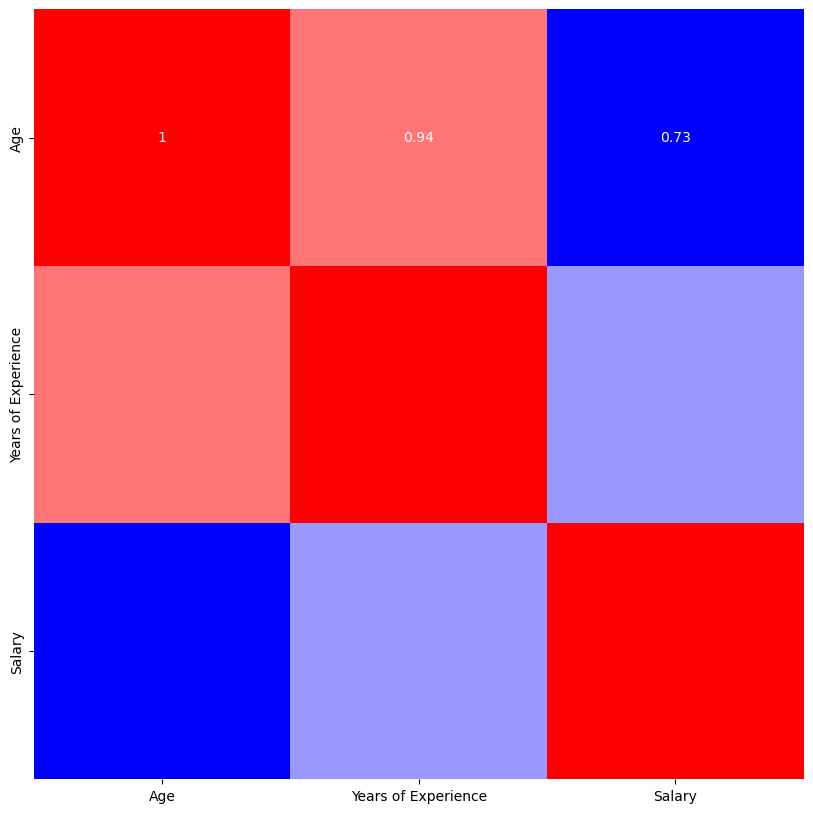

In [14]:
#corelasi penuh warna merah dan putih tidak
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only=True), cmap='bwr', cbar=False, annot=True, square=True)

# 6. Splitting Data

In [15]:
#X sebagai variabel indepedent/variable bebas/variabel independent/ predictor, yakni year of experience
X = dataset.iloc[:, 4:5].values # mengambil kolom ke-4 hingga sebelum ke-5
print(X)

[[ 5.]
 [ 3.]
 [15.]
 ...
 [ 4.]
 [14.]
 [ 1.]]


In [16]:
#Y sebagai variabel dependent/variable terikat/variabel tak bebas/ response, yakni Gaji
Y = dataset.iloc[:, 5].values
print(Y)

[ 90000.  65000. 150000. ...  55000. 140000.  35000.]


In [17]:
# Membagi data menjadi Training Set dan Test Set
# import sckit learn untuk tools split data dan Machine Learning
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0) # 80% data digunakan untuk pelatihan, 20% sisanya untuk pengujian
print(X_train.shape)
print(X_train)

(5358, 1)
[[11.]
 [10.]
 [ 4.]
 ...
 [18.]
 [17.]
 [ 8.]]


# 7. Modelling

In [18]:
# panggil modul LinearRegression untuk menjalankan regresi linear
from sklearn.linear_model import LinearRegression
# membuat objek regresi linear dan menyimpan object linear Regression
lin_reg = LinearRegression()
# membangun model (training model dari data set yang sudah kita split)
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [19]:
# cari tau nilai slope/koefisien (θi ) dan intercept (θ0).
# ŷ=θ0+θiΧi+Ɛi
# nilao koefisien regresi (slope): berapa banyak Salary bertambah tiap 1 tahun tambahan pengalaman (Years of Experience)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[7044.04234834]
58560.39643187086


8. Evaluation

In [20]:
# memprediksi model dengan test set(melakukan proses testing)
Y_prediksi = lin_reg.predict(X_test)

In [21]:
#Lakukan evaluasi performa
#tampilkan hasil dari data aktual dan data prediksi
df = pd.DataFrame({'aktual': Y_test, 'Prediksi': Y_prediksi})
print(df)

        aktual       Prediksi
0     200000.0  178309.116354
1     130000.0  121956.777567
2      65000.0   72648.481129
3     155000.0  100824.650522
4      55000.0   79692.523477
...        ...            ...
1335  185000.0  157176.989309
1336  140000.0  121956.777567
1337   70000.0   93780.608174
1338  185982.0  241705.497489
1339  151901.0  129000.819915

[1340 rows x 2 columns]


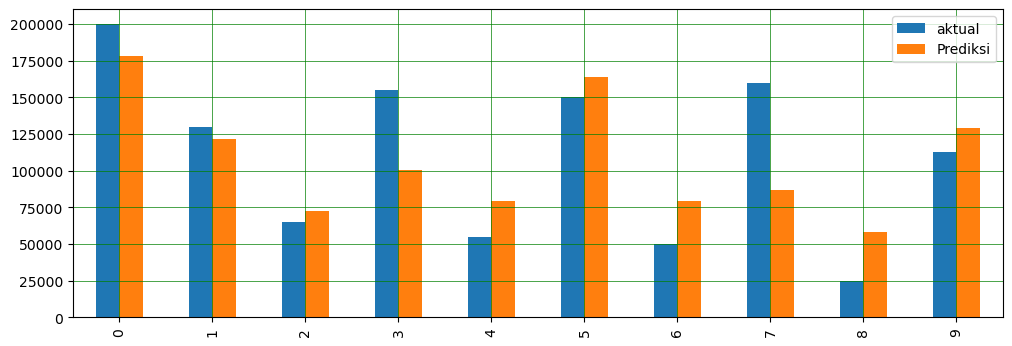

In [22]:
#visualisasi galat/ selisih data aktual dengan data prediksi
df.head(10).plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [23]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MAE, MSE dan RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediksi))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_prediksi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_prediksi)))

Mean Absolute Error: 25118.29859560202
Mean Squared Error: 959671597.1868122
Root Mean Squared Error: 30978.566738743935


Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja (training set)')

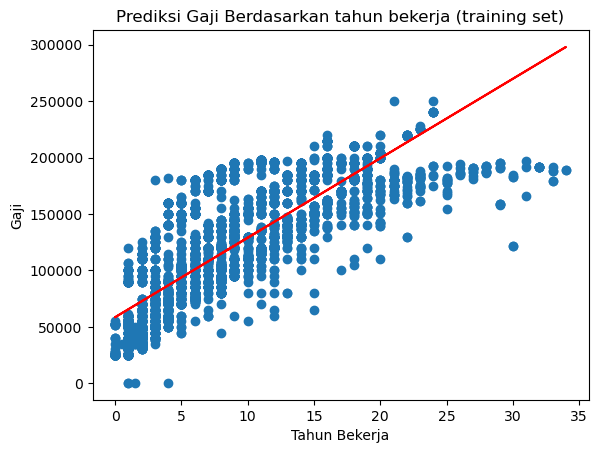

In [24]:
#visualisasi data training

plt.scatter(X_train, Y_train)
plt.plot(X_train, lin_reg.predict(X_train), c='red')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja (training set)')

Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

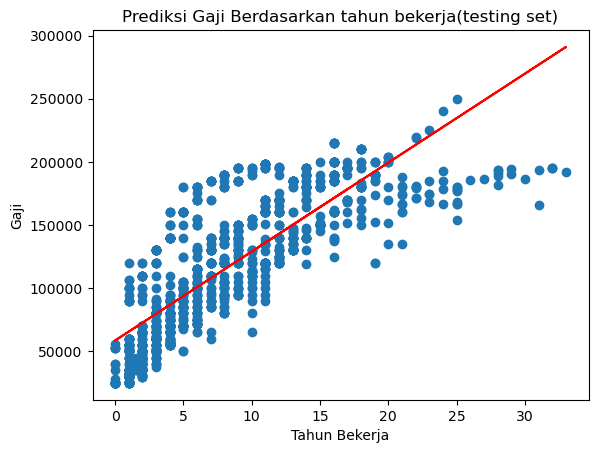

In [25]:
#visualisasi data dari data testing
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_prediksi, c='r')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

# 9. Prediction

In [26]:
# mencoba studi kasus, misal kita prediksi gaji seseorang yang telah bekerja selama 2.7, 5.5, 7.5 tahun
print('Gaji Seseorang setelah bekerja selama 2.7 tahun adalah',lin_reg.predict([[2.7]]))
print('Gaji Seseorang setelah bekerja selama 5.5 tahun adalah',lin_reg.predict([[5.5]]))
print('Gaji Seseorang setelah bekerja selama 7.5 tahun adalah',lin_reg.predict([[7.5]]))

Gaji Seseorang setelah bekerja selama 2.7 tahun adalah [77579.31077239]
Gaji Seseorang setelah bekerja selama 5.5 tahun adalah [97302.62934775]
Gaji Seseorang setelah bekerja selama 7.5 tahun adalah [111390.71404443]


In [27]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
import joblib

In [29]:
joblib.dump(lin_reg, 'lin_reg_model_updated.joblib')

['lin_reg_model_updated.joblib']